In [ ]:
import torch

In [ ]:
x = torch.empty #It is empty vector

In [ ]:
x = torch.empty(3) #It is 1-D vector

In [ ]:
x = torch.empty(2, 3) #It is 2-D vector

In [ ]:
x = torch.empty(2, 2, 2, 2) # It is 4-D vector

In [ ]:
#Create tensor with random values:

x = torch.rand(2, 2)
print(x)

tensor([[0.0406, 0.4780],
        [0.0356, 0.2159]])


In [ ]:
#Create tensor with zero values or ones values

x = torch.zeros(2, 2)
print(x)
y = torch.ones(2, 2)
print(y)

tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


In [ ]:
#Setting datatype

x = torch.ones(2, 2, dtype=torch.int)

In [ ]:
print(x.size()) # So '.size()' function gives size of tensor

torch.Size([2, 2])


In [ ]:
# Custom values

x = torch.tensor([2.5, 5.0, 7.5]) # 1-D tensor
print(x)

tensor([2.5000, 5.0000, 7.5000])


In [ ]:
# How tensor values and operations work:

x = torch.tensor([[2, 3], [4, 5]]) # 2-D tensor
y = torch.tensor([[8, 7], [6, 5]]) # 2-D tensor

z1 = torch.add(x, y) # for addition, or we can also do as
print(z1)
z2 = x + y
print(z2)

z3 = torch.sub(x, y) # for subtraction, or we can also do as
print(z3)
z4 = x - y
print(z4)

z5 = torch.div(x, y) # for division, or we can also do as
print(z5)
z6 = x/y
print(z6)

z7 = torch.mul(x, y) # for multiplicaion, or we can also do as
print(z7)
z8 = x * y
print(z8)

tensor([[10, 10],
        [10, 10]])
tensor([[10, 10],
        [10, 10]])
tensor([[-6, -4],
        [-2,  0]])
tensor([[-6, -4],
        [-2,  0]])
tensor([[0.2500, 0.4286],
        [0.6667, 1.0000]])
tensor([[0.2500, 0.4286],
        [0.6667, 1.0000]])
tensor([[16, 21],
        [24, 25]])
tensor([[16, 21],
        [24, 25]])


In [ ]:
# Slicing

x = torch.tensor([[2, 3], [4, 5]])
print(x[1]) # This will fetch the 1st index tensor from x i.e., we can see [4, 5]
print(x[1, 0]) # This wil fetch the 0th index element from 1st index tensor from x i.e., 4 as we can see easily

tensor([4, 5])
tensor(4)


In [ ]:
#Reshaping Tensor:

In [ ]:
#y = x.view()
#It is used to reshape the tensor

In [ ]:
 #For ex., x.view(-1, _) --> So the blank space represents no of values we want in single tensor.

# **Tensor to Numpy**

In [ ]:
# Let's print tensor with dimensions 1*5 with ones values
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)
print(type(b))

# BE CAREFUL because if tensor is always on the CPU and not GPU then all of the objects will share same memory location

# For ex:

a.add_(1) # then it will add 1 in each tensor a

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


tensor([2., 2., 2., 2., 2.])

# **Numpy to Tensor**

In [ ]:
import numpy as np

a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

a += 1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


**Note**: Numpy can only handle CPU tensor and we cannot convert GPU tensor back to Numpy

In [ ]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


**requires_grad** -> Tells PyTorch that it will need to calculate gradients for this tensor late in our optimization steps.  
So whenever we have a variable in our model that we want to optimize then we need the gradients so we need to specify **requires_grad = True**

# **Autograd package in PyTorch**

In [ ]:
import torch

x = torch.tensor([1, 2, 3])
print(x)


# We want to calculate gradient of some functionwith respect to x nd we pass requires_grad = True

y = x + 2
print(y)

tensor([1, 2, 3])
tensor([3, 4, 5])




```
   X
    \
     \
       '+' --> Y
     /
    /
   2
```



For each operation we have a node of inputs and outputs so here operation is **'+'** and inputs are **x** & **2** and out is **Y**  
Now with this graph in the technique called Backpropagation we can do calculate the gradients

```
   Forward pass
   ------------->

   X            --|
    \             |
     \            |
       '+' --> Y  | grad_fn
     /            |
    /             |
   2            --|

   <------------
   Add Backward
```

In forward pass we calculate an output  'Y' and since we specified requiring gradient PyTorch will automatically create and store a functn for us and this function is then used in back propagation and to get the gradients.
So here, Y has an attribute grad_fn so this will point to the gradient function 'Add Backward' in our case we named and this function can then calculate the gradients in the backward pass so it will calculate Y with respect to X in this case.
When we want to calculate gradients,the only thing we must to call is **z.backward()** so it will calculate Y, dZ/dX and print (x.grad)

In [ ]:
import torch

# tensor X with requires_grad=True
X = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
print(X)

# perform computation with X
Y = X + 2
print(Y)

Z = Y * Y * 2
Z = Z.mean()
print(Z)

# Backward pass to compute gradients
Z.backward()  # computing gradients dZ/dX
print(X.grad)  # gradients of X

tensor([1., 2., 3.], requires_grad=True)
tensor([3., 4., 5.], grad_fn=<AddBackward0>)
tensor(33.3333, grad_fn=<MeanBackward0>)
tensor([4.0000, 5.3333, 6.6667])


Jacobian matrix with partial derivatives and we multiply it with a gradient vector and we get the final gradients  
For using **backward()** our value must be scalar  

In [ ]:
import torch

X = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
print(X)

Y = X + 2
print(Y)

Z = Y * Y * 2
# Z = Z.mean()
print(Z)

V = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
Z.backward(V)
print(X.grad)

tensor([1., 2., 3.], requires_grad=True)
tensor([3., 4., 5.], grad_fn=<AddBackward0>)
tensor([18., 32., 50.], grad_fn=<MulBackward0>)
tensor([ 1.2000, 16.0000,  0.0200])


How can we prevent from tracking the Gradients?  
We have 3 options:  
(i) requires_grad_(False)  
(ii) x.detach()  
(iii) with torch.no_grad()  
So using these techniques we can stop gradient functions and tracking history of our computational graph.  


Whenever we call **backward()** function, then the gradient for this tensor will be accumulated to the **'.grad'** attribute.  
So the values will be summed up.  
So here we must be very careful.

In [ ]:
a = [1, 2, 3]
x = torch.tensor(a, dtype=torch.float32, requires_grad = True) # need to mention dtype
print(x)

X = x + 2
x.requires_grad_(False)
print(x)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 2., 3.])


In [ ]:
# define tensor x with requires_grad=True
x = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
print(x)

# perform operations on x and store the result in a new variable
y = x + 2

# detach the new tensor to prevent further gradient tracking
y = y.detach()
print(y)

tensor([1., 2., 3.], requires_grad=True)
tensor([3., 4., 5.])


In [ ]:
import torch

# define tensor x with requires_grad=True
x = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
print(x)

# perform operations on x without tracking gradients
with torch.no_grad():
    y = x + 2
print(y)

tensor([1., 2., 3.], requires_grad=True)
tensor([3., 4., 5.])


In [ ]:
# Ex:

weights = torch.ones(4, requires_grad=True)

for epoch in range(1):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])


So here is the explanation:  
So firstly I created a Tensor 'weights' having size 1*4 and values as 1's i.e., [1, 1, 1, 1], then a loop runs for 1 iteration. In Deep Learning an epoch refers to one forward pass and one backward pass.  
Then calculating model's output by multiplying each element in tensor 'weights' by 3, [1, 1, 1, 1] * 3 = [3, 3, 3, 3] and summing up all the elements 3 + 3 + 3 + 3 = 12.  
Then it performs back propagation to compute gradients of the loss with respect to the weights (It computes the gradients using automatic differentiation provided by PyTorch). Gradients represent the slope of the loss function with respect to each weight, which guides the optimization process during training.   
Forward Pass: model_output = SUMMATION(3 * weights[i])  
model_output.backward(): PyTorch computes the gradients of the loss with respect to the weights.  
Since loss function in this case is model_output, which is a scalar, the gradients represent how much each weight contributes to the loss.  
Since the loss is a simple linear function, the gradient for each weight is simply the coefficient (which is 3 in this case).  
So after the backward pass, the gradient for each weight become [3, 3, 3, 3]   
Then I directly just print gradients.  



If I go for 2, 3 or so on iterations, I get reults as:

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


So the weights and gradients we can see clearly are incorrect.  
So for next iterations and optimization steps steps, I must need to empty the gradients

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# **PyTorch Built-in optimizer**

In [ ]:
import torch

weights = torch.ones(4, requires_grad=True)
print("Initial weights:")
print(weights)

# optimizer
optimizer = torch.optim.SGD([weights], lr=0.01)

# performing a single optimization step
optimizer.step()
print("Weights after optimization step:")
print(weights)

# zero out the gradients
optimizer.zero_grad()

# verify that gradients are zeroed out
print("Gradients after zero_grad:")
print(weights.grad)

Initial weights:
tensor([1., 1., 1., 1.], requires_grad=True)
Weights after optimization step:
tensor([1., 1., 1., 1.], requires_grad=True)
Gradients after zero_grad:
None


SGD -> Stochastic Gradient Descent having weights as parameters and learning rate.

This we do exactly same  
Whenever we wants to calculate gradients, we must specify required_grad as True. Then we can simply calculate the gradients with **backward()** function and before we want to perform the next operation or next iteration our optimization steps we must empty our gradients **'.grad.zero()'**

## **Backpropagation:**
### Chain rule:  


```
   input  +----------+   output(y) input(y)  +----------+  output(z)
--------->|   a(x)   |----------><---------->|   b(y)   |---------->
          +----------+                       +----------+   
```



We give input **'x'** and apply thjis in function **a(x)** then gets the output **'y'**, this output gets new input and is applied on the funcion **'b(y)'** and gets new output **'z'**

Now, we want to minimize 'z'. So we want to know the revertive of 'z' with respect to 'x' and we can do this using chain rule.  
**dz/dx = (dz/dy) * (dy/dx)**

Computational graph:  


```
+-----+
|     |
+-----+
       \
        \ x
         \         +-----+     z
          ---------|  f  |---------->
         /         +-----+
        / y
       /
+-----+
|     |
+-----+
```
For every operation we do with tensor, pytorch creates a graph for us. So at each node we apply one operation or function with some inputs & then get an output.



```
[dz/dx] = (dx.y/dx) = y
X
 \
  \
   \
    +-----+
    |  f  |     z
    |     |---------->
    | x*y |
    +-----+
   /
  /
 /
y
[dz/dy] = (dy.x/dy) = x

[dz/dx] = (dx.y/dx) = y
                       \__________ logical gradients
                       /
[dz/dy] = (dy.x/dy) = x

```




### **Why to Graph?**  
Our graph has more operations and at the end we calculate the loss function that we want to minimize.  
So we have to calculate the gradients of this loss with respect to our parameters 'x' inmm the beginning.

Whole concept consists of 3 steps:  
i. Forward pass: Compute loss.  
ii. Compute local gradients  
iii. Backward Pass: Compute [**d(loss)/d(weights)**] using chain rule.

Ex: Linear Regreassion (MSE)  
y_prediction = w . x  
loss = (y_prediction - y)^2 = (wx - y)  

```
x
 \
  \
   \            +-----+   y_pred  +-----+     S     +-----+   loss
    |---------->|  *  |---------->|  -  |---------->|  ^2 |---------->
   /            +-----+           +-----+           +-----+
  /                                  ^
 /                              y_____|
w
```

Forward pass x=1, y=2, w=1

y_pred = 1 * 1 = 1  
S = y_pred - y = 1 -2 = -1  
(S)^2 = (-1)^2 = 1  
  
d(y_pred) / dw = (dw . x) / dw = x  
d(S) / d(y_pred) = d(y_pred - y) / d(y_pred) = 1  
d(loss) / d(S) = d(S)^2 / dS = 2S  
  
Backward Pass:  
d(loss) / d(y_pred) = [d(loss) / d(S)].[d(S) / d(y_pred)] = 2S * 1 = -2 (as S = -1)  
d(loss) / dw = [d(loss) / dy].[d(y_pred) / dw] = -2.x = -2 * 1 = -2 (as x = 1)

Let's implement with an example:

In [ ]:
import torch

#Data
X = torch.tensor(1.0)
Y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True) #weights

#Forward Pass and compute the loss
y_pred = w * X
loss = (y_pred - Y)**2
print(loss)

#Backward Pass
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# **Gradient Descent with Autograd and Backpropagation**  
  
------------------------------------------------
  
Prediction: Manually  
Gradients Computation: Manually  
Loss Computation: Manually  
Parameters update: Manually    

------------------------------------------------  

Prediction: Manually  
Gradients Computation: Autograd  
Loss Computation: Manually  
Parameters update: Manually   
  
------------------------------------------------  
  
Prediction: Manually  
Gradients Computation: Autograd  
Loss Computation: PyTorch Loss  
Parameters update: PyTorch Optimizer  

------------------------------------------------  

Prediction: PyTorch Model  
Gradients Computation: Autograd  
Loss Computation: PyTorch Loss  
Parameters update: PyTorch Optimizer  

In [ ]:
# Prediction: Manually
# Gradients Computation: Manually
# Loss Computation: Manually
# Parameters update: Manually

import numpy as np
import torch

#f = w*x
#f = 2*x
x = np.array([1, 2, 3, 4], dtype = np.float32)
y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.0

#model prediction
def forward(x):
  return w * x

#Loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

#Gradient
#MSE = 1/N (w*x - y)**2
#dj/dw = 1/N (2*x)(w*x - y)
def gradient (x, y, y_predicted):
  return np.dot(2*x, y_predicted - y).mean()
print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(x)

  #loss
  l = loss(y, y_pred)

  #gradients
  dw = gradient(x, y, y_pred)

  #update weights
  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f'epoch{epoch + 1}:w = {w:.3f}, loss={l:.8f}')
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch1:w = 1.200, loss=30.00000000
epoch2:w = 1.680, loss=4.79999924
epoch3:w = 1.872, loss=0.76800019
epoch4:w = 1.949, loss=0.12288000
epoch5:w = 1.980, loss=0.01966083
epoch6:w = 1.992, loss=0.00314574
epoch7:w = 1.997, loss=0.00050331
epoch8:w = 1.999, loss=0.00008053
epoch9:w = 1.999, loss=0.00001288
epoch10:w = 2.000, loss=0.00000206
epoch11:w = 2.000, loss=0.00000033
epoch12:w = 2.000, loss=0.00000005
epoch13:w = 2.000, loss=0.00000001
epoch14:w = 2.000, loss=0.00000000
epoch15:w = 2.000, loss=0.00000000
epoch16:w = 2.000, loss=0.00000000
epoch17:w = 2.000, loss=0.00000000
epoch18:w = 2.000, loss=0.00000000
epoch19:w = 2.000, loss=0.00000000
epoch20:w = 2.000, loss=0.00000000
Prediction before training: f(5) = 10.000


Explanation:  
**Step 1: Import necessary libraries:**  
So firstly, we  import the necessary libraries,   
**numpy** -> numerical computations and   
**torch** -> using PyTorch (though in this code, PyTorch isn't actually used).    
  
**Step 2: Define data and initial parameters:**   
**x** and **y** are arrays of input and output data.  
**x** -> input  
**y** -> expected output  
**w** -> weight of our model, initially set to 0.  
  
**Step 3: Define model prediction function:**  
function takes 'x' as input and returns predicted output by multiplying 'x' with weight 'w'  
  
**Step 4: Define loss function:**  
loss function calculates how far off our predictions are from the actual values using mean squared error (MSE).  
  
**Step 5: Define Gradient Calculation:**  
This function calculates the gradient, which tells how to change 'w' to reduce the loss.  
Formula used is derived from the derivative of the loss function with respect to 'w'.   
  
**Step 6: Print Initial Prediction:**  
Before training, we check model's prediction for x=5. With 'w' being 0, this will output 0.  
  
**Step 7: Training Loop:**  
**learning_rate** -> how big of a step we take when updating 'w'  
**n_items** -> number of times we go through the training loop.  
  
**Step 8: Training process:**  
For each iteration (epoch) in the training loop  
**Prediction** -> Calculate the predicted 'y' values using the current weight 'w'.    
**Loss** -> Calculate the loss using predicted 'y' and actual 'y'.  
**Gradient** -> Calculate the gradient to understand how to adjust 'w'.  
**Update weights** -> Adjust 'w' by subtracting the product of 'learning_rate' and 'dw'.   
**Print Progress** -> Every epoch, print the current epoch number, weight and loss.  
  
**Step 9: Print final Prediction:**  
After training, we check the model's prediction for x = 5 again see hoow much it improved.

So, we start with an initial weight 'w' of 0.  
We predict values, calculate loss, find the gradient and update 'w' iteratively.  
After several iterations, our model's weight 'w' should improve, reducing the loss and making better predictions.

In [ ]:
# Prediction: Manually
# Gradients Computation: Autograd
# Loss Computation: Manually
# Parameters update: Manually

import numpy as np
import torch

#f = w*x
#f = 2*x
x = np.array([1, 2, 3, 4], dtype = np.float32)
y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.0

#model prediction
def forward(x):
  return w * x

#Loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

#Gradient
#MSE = 1/N (w*x - y)**2
#dj/dw = 1/N (2*x)(w*x - y)
def gradient (x, y, y_predicted):
  return np.dot(2*x, y_predicted - y).mean()
print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(x)

  #loss
  l = loss(y, y_pred)

  #gradients
  dw = gradient(x, y, y_pred)

  #update weights
  w -= learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch{epoch + 1}:w = {w:.3f}, loss={l:.8f}')
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch1:w = 1.200, loss=30.00000000
epoch3:w = 1.872, loss=0.76800019
epoch5:w = 1.980, loss=0.01966083
epoch7:w = 1.997, loss=0.00050331
epoch9:w = 1.999, loss=0.00001288
epoch11:w = 2.000, loss=0.00000033
epoch13:w = 2.000, loss=0.00000001
epoch15:w = 2.000, loss=0.00000000
epoch17:w = 2.000, loss=0.00000000
epoch19:w = 2.000, loss=0.00000000
Prediction before training: f(5) = 10.000


If we make changes in:
```
  if epoch % 2 == 0:
    print(f'epoch{epoch + 1}:w = {w:.3f}, loss={l:.8f}')
print(f'Prediction after training: f(5) = {forward(5):.3f}')
```
So it will run epochs (iterations) only for odd numbers.  
Now this is the implementation where we did everything manually and now let's replace the gradient calculation.  
We don't use numpy anymore, so will just use torch and use PyTorch.

In [ ]:
# Prediction: Manually
# Gradients Computation: Autograd
# Loss Computation: PyTorch Loss
# Parameters update: PyTorch Optimizer


import torch
#f = w * x
#f = 2 * x

x = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype = torch.float32) #

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#Model Prediction
def forward(x):
  return w*x

#Loss = MSE
def Loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

print(f'Prediction before training : (5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  #Prediction = forward pass
  y_pred = forward(x)

  #Loss
  l = Loss(y, y_pred)

  #Gradients = backward pass
  l.backward() #dl/dw

  #Update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  #Zero gradients
  w.grad.zero_()

  if epoch % 2 == 0:
    print(f'epoch{epoch + 1}:w = {w:.3f}, loss = {l:.8f}')
print(f'Prediction after training : f(5) = {forward(5):.3f}')

Prediction before training : (5) = 0.000
epoch1:w = 0.300, loss = 30.00000000
epoch3:w = 0.772, loss = 15.66018772
epoch5:w = 1.113, loss = 8.17471695
epoch7:w = 1.359, loss = 4.26725292
epoch9:w = 1.537, loss = 2.22753215
epoch11:w = 1.665, loss = 1.16278565
epoch13:w = 1.758, loss = 0.60698116
epoch15:w = 1.825, loss = 0.31684780
epoch17:w = 1.874, loss = 0.16539653
epoch19:w = 1.909, loss = 0.08633806
Prediction after training : f(5) = 9.612


So,  
1st step:  
To design our model. So we design the number of inputs and outputs (input size, output size, forward pass). Also we design forward pass for all the different layers.  
  
2nd step:  
We construct loss and optimizer  
  
3rd step:  
Training loop by doing:  
- forward pass: compute prediction.  
- backward pass: get the gradients.  
- Then update the weights.

So now, let's replace loss and the optimization.  
For this we import neural network module.
```
import torch.nn as nn
```
Now we don't need to decide loss manually anymore. So we can simply remove this.  
Before our training, we still need to decide our loss  
loss = nn.MSELoss()  
Then we also need an optimizer from PyTorch    
optimizer = torch.optim.SGD([w], lr = learning_rate)    
SGD -> Stochastic Gradient Descent  
which needs some parameters that it should optimize and it will nede this as a list.  
So, we put our **w** and also **lr** which is learning rate.  
Now, going towards our training loop  
loss computation is still not the same, because this is a callable function which gets the actual y and predicted_y and then we don't need to manually update our weights anymore.  
So we can simply do:  
optimizer.step() which will do optimization steps.  
  
And, also we still have to empty our gradients after the optimization steps  
We can say  
optimizer.zero_grad()  
And now we are done with step 3.  
  
Let's continue with the stepp 4 and replace our manually implemented forward method a PyTorch method.  
  
So for this we also don't need weights anymore because our PyTorch model knows the parameters.  
So, here we say:  
model = nn.Linear()  
This needs an input size and output size of our features and for this we need to do some modifications.  
  




In [ ]:
# Prediction: PyTorch Model
# Gradients Computation: Autograd
# Loss Computation: PyTorch Loss
# Parameters update: PyTorch Optimizer

In [ ]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass -> compute prediction
# - backward pass -> gradients
# - update weights

In [2]:
#So now, let's replace loss and the optimization.
# For this we import neural network module.
# Step 1:

import torch.nn as nn
import torch
import torch.nn as nn

#f = w * x
#f = 2 * x



#=================================================================================================================================================================================
# Step 2:
# So our x and y needs to have a different shapes. So this must be a 2D array now. With a number of rows is the number of samples and for each row we have the number of features.

x = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)
x = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

x_test = torch.tensor([5], dtype = torch.float32)

# Let's get the shape:
# num_samples, num_features = x.shape

n_samples, n_features = x.shape
print(n_samples, n_features)


# Now, we need to give this to our model. So we say our input size and output size then we want to get the prediction we can simply say we can call them model.
# But now this cannot have a float value so this must be a tensor.

input_size = n_features
output_size = n_features


# Now, we define our model. So this needs an input and output size is still the same. So this is also number of features.

model = nn.Linear(input_size, output_size) #After Step 4

# So let's create a test tensor let's say:
# X_test = torch.tensor which gets only one sample with 5 and then its get a datatype of say torch.float32 and then we pass this X_test sample in model.
# Since this is the only one val has only one value we can call it as .item():.3f to get actual float value name.
# Same we do for backward pass.

# WE SET X_test IN STEP 1 and USE IT IN THIS STEP ITSELF i.e in STEP 2 IN LINE:
# print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')




# And now we also have to modify our optimizer here. So we don't have a weights now. So this lists with the parameter. We can simply say:
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# Now, for prediiction we also simply call model and now we are done, so now we are going to use pytorch model. So now we are using PyTorch model.

# for epoch in range(n_iters):
#   #Prediction = forward pass
#   y_prediction = model(x)

# THIS ALL MUST BE DONE IN STEP 4




print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')



#=================================================================================================================================================================================
#Step 3:
#Training

learning_rate = 0.01
n_iters = 100

#Now we don't need to decide loss manually anymore. So we can simply remove this.
# Before our training, we still need to decide our loss
# loss = nn.MSELoss()

# Then we also need an optimizer from PyTorch
# optimizer = torch.optim.SGD([w], lr = learning_rate)
# SGD -> Stochastic Gradient Descent
# which needs some parameters that it should optimize and it will nede this as a list.
# So, we put our w and also lr which is learning rate.

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)




#=================================================================================================================================================================================
#Step 4:
# Now, going towards our training loop
# loss computation is still not the same, because this is a callable function which gets the actual y and predicted_y and then we don't need to manually update our weights anymore.
for epoch in range(n_iters):
  #Prediction = forward pass
  y_prediction = model(x)

  #Loss
  l = loss(y, y_prediction)

  #Gradients = backward pass
  l.backward() #dl/dw

  # So we can simply do:
  # optimizer.step() which will do optimization steps.

  #Update weights
  optimizer.step()

  # And, also we still have to empty our gradients after the optimization steps
  # We can say
  # optimizer.zero_grad()

  #Zero gradients
  optimizer.zero_grad()

  # And now we are done with step 4.
  # Let's continue with the stepp 4 and replace our manually implemented forward method a PyTorch method.
  # So for this we also don't need weights anymore because our PyTorch model knows the parameters.
  # So, here we say:
  # model = nn.Linear() in step 2
  # This needs an input size and output size of our features and for this we need to do some modifications.




#=================================================================================================================================================================================
#Step 5:

# To get this and also if we want to print them we have to print them again.
# if epoch % 10 == 0:
#   [w, b] = model.parameters()
# This will unpack them and then if we want to print the actual, this will be a list of lists.
# So lets get the first or the actual first weight and we can also call the item() because we don't want to see tensor.
# print(f'epoch{epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')





  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f'epoch{epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')


# This is how we construct training pipeline.
# In this case we didn't have to come up with the model for ourselves. So here we we only have one layer and this is already provided in PyTorch.

# model = nn.Linear (input_size, output_size)

4 1
Prediction before training: f(5) = -4.217
epoch1: w = -0.430, loss = 60.30207443
epoch11: w = 1.356, loss = 1.69045520
epoch21: w = 1.650, loss = 0.16644992
epoch31: w = 1.705, loss = 0.11987763
epoch41: w = 1.721, loss = 0.11194585
epoch51: w = 1.730, loss = 0.10540530
epoch61: w = 1.739, loss = 0.09926949
epoch71: w = 1.746, loss = 0.09349152
epoch81: w = 1.754, loss = 0.08804980
epoch91: w = 1.761, loss = 0.08292492
Prediction after training: f(5) = 9.521


Explanation:  
So our x and y needs to have a different shapes. So this must be a 2D array now. With a number of rows is the number of samples and for each row we have the number of features.  
x = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)   
y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)  
  
Let's get the shape:  
num_samples, num_features = x.shape  
  
Now, we define our model. So this needs an input and output size is still the same. So this is also number of features.  
Now, we need to give this to our model. So we say our input size and output size then we want to get the prediction we can simply say we can call them  model. But now this cannot have a float value so this must be a tensor.  
  
So let's create a test tensor let's say:  
X_test = torch.tensor which gets only one sample with 5 and then its get a datatype of say torch.float32 and then we pass this X_test sample in model. Since this is the only one val has only one value we can call it as .item():.3f to get actual float value name.  
Same we do for backward pass.  
And now we also have to modify our optimizer here. So we don't have a weights now. So this lists with the parameter. We can simply say:  
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)  
Now, for prediiction we also simply call model and now we are done, so now we are going to use pytorch model. So now we are using PyTorch model.  
```
for epoch in range(n_iters):
  #Prediction = forward pass
  y_prediction = model(x)
```
To get this and also if we want to print them we have to print them again.  
```
if epoch % 10 == 0:
  [w, b] = model.parameters()
```
This will unpack them and then if we want to print the actual, this will be a list of lists.  
So lets get the first or the actual first weight and we can also call the item() because we don't want to see tensor.  


```
print(f'epoch{epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
```
This is how we construct training pipeline.  
In this case we didn't have to come up with the model for ourselves. So here we we only have one layer and this is already provided in PyTorch.  



```
model = nn.Linear (input_size, output_size)
```

But let's say we need custom model. Then we can do like:

In [1]:
# Step 1: Import necessary libraries and define the model
import torch
import torch.nn as nn

# f = w * x
# f = 2 * x

#=================================================================================================================================================================================
# Step 2: Define the data and initialize the model

# Define input and output tensors
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

# Define a test input tensor
x_test = torch.tensor([5], dtype=torch.float32)

# Get the number of samples and features from the input tensor
n_samples, n_features = x.shape
print(n_samples, n_features)  # Output: 4 1

# Define the Linear Regression model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # Define the linear layer with input and output dimensions
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # Define the forward pass
        return self.lin(x)

# Initialize the model
input_size = n_features
output_size = n_features  # This should be 1 because we are predicting a single value
model = LinearRegression(input_size, 1)

# Print the initial prediction before training
print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

#=================================================================================================================================================================================
# Step 3: Define the loss function and the optimizer

# Set the learning rate and the number of iterations
learning_rate = 0.01
n_iters = 100

# Define the Mean Squared Error (MSE) loss function
loss = nn.MSELoss()

# Define the Stochastic Gradient Descent (SGD) optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#=================================================================================================================================================================================
# Step 4: Training loop

for epoch in range(n_iters):
    # Prediction = forward pass
    y_prediction = model(x)

    # Compute the loss
    l = loss(y, y_prediction)

    # Compute gradients = backward pass
    l.backward()  # Compute the gradients of the loss with respect to the model parameters

    # Update weights
    optimizer.step()

    # Zero the gradients to prevent accumulation
    optimizer.zero_grad()

    # Print loss and weights every 10 epochs
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

#=================================================================================================================================================================================
# Step 5: Print the prediction after training

print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')

# Explanation:
# 1. We imported the necessary libraries.
# 2. We defined the input (x) and output (y) tensors and a test input (x_test).
# 3. We created a simple Linear Regression model with one linear layer.
# 4. We defined the MSE loss function and the SGD optimizer with a specified learning rate.
# 5. We trained the model over a number of iterations (n_iters).
#    - In each iteration, we performed a forward pass to get the predictions.
#    - We computed the loss between the predictions and the actual values.
#    - We performed a backward pass to compute the gradients.
#    - We updated the model's parameters using the optimizer.
#    - We zeroed the gradients to prevent them from accumulating.
#    - We printed the weights and loss every 10 epochs for monitoring.
# 6. We printed the prediction for x_test (5) before and after training to see the improvement.


# Explanation in a mathematical manner:
# Let's denote:
# - `x` as the input features.
# - `y` as the target values.
# - `w` as the weights of the model.
# - `b` as the bias of the model.
# - `learning_rate` as the learning rate (η).
# - `n_iters` as the number of iterations.
# - `l` as the loss function (Mean Squared Error).

# In the context of linear regression, the model prediction `y_pred` is given by:
# y_pred = w * x + b

# The Mean Squared Error (MSE) loss function is:
# MSE = (1/N) * Σ(y - y_pred)^2
# where N is the number of samples.

# During each iteration of the training loop, the following steps are performed:

# 1. Forward pass: Compute the predicted values using the current weights and bias.
#    y_pred = w * x + b
# 2. Compute the loss: Calculate the difference between the predicted values and the actual target values.
#    l = (1/N) * Σ(y - y_pred)^2
# 3. Backward pass: Compute the gradients of the loss with respect to the model parameters (w and b).
#    dl/dw = (2/N) * Σ((y_pred - y) * x)
#    dl/db = (2/N) * Σ(y_pred - y)
# 4. Update weights: Adjust the weights and bias using the computed gradients and the learning rate.
#    w = w - η * dl/dw
#    b = b - η * dl/db
# 5. Zero the gradients: Reset the gradients to zero to prevent accumulation from previous iterations.
# These steps are repeated for a specified number of iterations (n_iters) until the model converges to the optimal weights and bias that minimize the loss function.
# After training, the model parameters (w and b) should be optimized, resulting in a better prediction for the test input.

4 1
Prediction before training: f(5) = -4.574
epoch 1: w = -0.535, loss = 62.21440506
epoch 11: w = 1.279, loss = 1.80817914
epoch 21: w = 1.581, loss = 0.23376960
epoch 31: w = 1.638, loss = 0.18215217
epoch 41: w = 1.656, loss = 0.17056650
epoch 51: w = 1.667, loss = 0.16061319
epoch 61: w = 1.677, loss = 0.15126398
epoch 71: w = 1.687, loss = 0.14245968
epoch 81: w = 1.696, loss = 0.13416776
epoch 91: w = 1.705, loss = 0.12635852
Prediction after training: f(5) = 9.409



```
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, X):
        return self.lin(X)
```
Let's write a custom linear regression model. Then we have to derive this from 'nn.Module' & this will get an ____init__() method which has self and which gets the input_dim -> input dimension and output_dim -> output dimension.  
____init__(self, input_dim, output_dim)   
Then we call super -> superclass of linear regression with self and then .____init__() this is how we call super constructor and then we define our layers.  
`self.lin = nn.Linear(input_dim, output_dim)`
And then we also have to implement the forward pass in our model class. So,  


```
def forward(self, X):
    return self.lin(X)
```
Now, we can do:  


```
model = LinearRegression(input_size, output_size)
```
This is how we decide our PyTorch model.

# **LINEAR REGRESSION**

Shape of x is:  torch.Size([100, 1])
Shape of y is:  torch.Size([100, 1])
Shape of n_samples is:  100
Shape of n_features is:  1

 epoch: 10, loss = 4451.3452

 epoch: 20, loss = 3319.6038

 epoch: 30, loss = 2500.7759

 epoch: 40, loss = 1907.7103

 epoch: 50, loss = 1477.7345

 epoch: 60, loss = 1165.7139

 epoch: 70, loss = 939.0977

 epoch: 80, loss = 774.3812

 epoch: 90, loss = 654.5707

 epoch: 100, loss = 567.3660


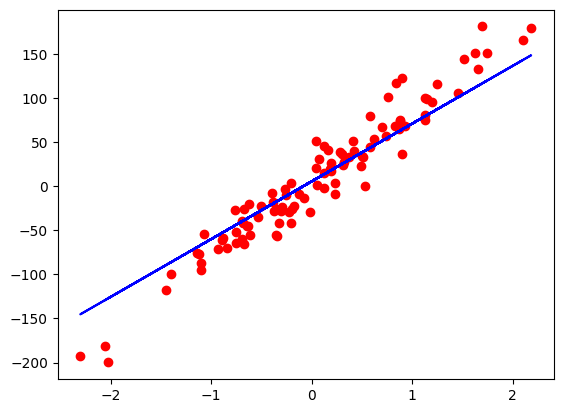

In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#Step 1:
# Design the model
# Prepare a dataset
x_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape
print("Shape of x is: ", x.shape)
print("Shape of y is: ", y.shape)
print("Shape of n_samples is: ", n_samples)
print("Shape of n_features is: ", n_features)


# 1) model:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
  # Forward pass
  y_predicted = model(x)

  loss = criterion(y_predicted, y)

  # Backward pass
  loss.backward()

  # Update
  optimizer.step()

  # Zero Gradients
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'\n epoch: {epoch + 1}, loss = {loss.item():.4f}')

# Plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

### **Steps performed:**  
**Prepare Dataset:**  
datasets.make_regression generates a random linear dataset with specified noise.
Convert the generated NumPy arrays to PyTorch tensors and ensure y is reshaped into a column vector.
  
**Define Model:**  
A simple linear regression model is defined using nn.Linear, which takes the input size (number of features) and output size.    
  
**Define Loss and Optimizer:**    
Mean Squared Error (MSE) is used as the loss function, appropriate for regression tasks.
Stochastic Gradient Descent (SGD) is chosen as the optimizer, with a specified learning rate.

**Training Loop:**  
For each epoch:  
Perform a forward pass to compute predictions.
Calculate the loss.  
Perform a backward pass to compute gradients.  
Update the model weights using the optimizer.  
Zero the gradients to prevent accumulation.  
Print the loss every 10 epochs for monitoring.  
  
**Plot Results:**  
After training, the predictions are detached from the computation graph and converted back to NumPy for plotting.  
The original data points are plotted in red, and the model's predictions are plotted in blue.  

**Explanation:**  
Typical Pipeline consistes of three steps:  
(i) Design model (input, output, forward pass)  
(ii) Construct loss and optimizer  
(iii) Training loop:  
- forward pass: compute prediction and loss
- backward pass: gradients  
- update weights  
  
```
x_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
```
Then we should convert these to torch tensor so we say,  

Now we convert this to float 32 data type but currently its double datatype so if we use double here, it may occur some errors because it is numpy array (datasets made in numpy arrays). Same for y.  
```
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
```
  
Then we reshape our y because right now it is an only one row and we want to make it a column vector. So we want to put each value in row and whole shape has only one column.

```
y = y.view(y.shape[0], 1)
```

Shape of x (for ex: (3, 4)) i.e., 3 rows and 4 columns.  
So we set same value i.e., shape of x as n samples, n_features like   
n_samples = 3  
n_features = 4  
  
So in our dataset there are overall 2 columns for x and y  
1 column for x and 1 for y  
And each have 100 rows or we can say values  
So, n_samples = 3 and n_features = 1
```
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape
print("Shape of x is: ", x.shape)
print("Shape of y is: ", y.shape)
print("Shape of n_samples is: ", n_samples)
print("Shape of n_features is: ", n_features)
```

Let's create a model now.  
So we define a model  
In Linear Regression case its just one layer so we can use built-in Linear model   


```
model = nn.Linear()
```

This is a linear layer and it needs input size and output size  
input_size -> no. of samples (no. of columns in x)  
output_size -> np. of features (no. of columns in y)  

```
model = nn.Linear(input_size, output_size)
```
Then we will be working on loss and optimizer  
  
We will be using a built-in loss function from PyTorch.  
In case of Linear Regression it is mean squared error.  
So we can say as:  

```
criterion = nn.MSELoss()
```
So we stored it in criterion  
Then we also set up the optimizer  
  
```
optimizer = torch.optim.SGD()
```
**torch.optim.SGD**  
torch.optim.SGD refers to the Stochastic Gradient Descent (SGD) optimizer. SGD is one of the simplest and most commonly used optimization algorithms in machine learning. The SGD optimizer updates the model's parameters using the gradients of the loss function with respect to each parameter  

Our optimizer needs parameters that it should optimize.  
So we can simply say:  

**model.parameters()**:  
model.parameters() is a method that returns an iterator over all the parameters of the model. These parameters are the ones that will be updated by the optimizer during the training process. When you pass model.parameters() to the optimizer, you are specifying that these are the parameters the optimizer should update.
  
**lr = learning_rate**:  
lr stands for learning rate, which is a hyperparameter that controls the step size of the parameter updates during training. The learning rate determines how much the parameters are adjusted with respect to the gradient. A larger learning rate can lead to faster convergence but might overshoot the optimal solution, while a smaller learning rate might lead to more precise convergence but can take longer to train. The learning rate needs to be chosen carefully and is often determined through experimentation.
```
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
```
  
**Training loop:**  
Firstly we must define number of epochs, let's say we want to perform 100 training iterations.  


```
num_epochs = 100  
for each epoch in range(num_epochs):
```
Here we do our steps in the training loop, the forward pass, the backward pass and the weight updates  
  
Let's suppose all about the forward pass and also the loss and then backward pass then updates.  
  
- So for forward pass we can say:  


```
y_predicted = model(x)
```

- Then we compute the loss by saying loss = criterion.  
This needs the actual labels and predicted values: **loss = criterion(y_predicted, y)**  
  
Now, in the backward pass to calculate the gradients we just say,  
So this will do the back propagation and calculate the gradients for us.  
  
- And then our update. Here we simply can say,  

**optimizer.step()**  
So this will update the weights and then before performing next iteration we have to be careful so we need to be empty our gradients now because whenever we all call the backward function, this will sum up the gradients into the .grad attribute. So now we want to empty this again  
  
- We simply say  
optimizer.zero_grad()  
Then we are done with the training loop.  
  
Then also print some information so let's say  
```
if (epoch + 1) % 10 == 0:
```
So every tenth iteration we want to print some information  
```
if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
```
.4f -> only 4 decimal values.  
  
So now we are done and also we can plot this, To get all the predicted values.  
  
```
predicted = model(x).detach().numpy()
```
  
We call our final model 'model(x)' and with all the data now we need to convert in numpy again but before we do that we detach our tensor. So we want to prevent this operation from being tracked in our graph and our computational graph.  
So this tensor has a required gradient arguments set to true, but now we want to be false. So this will generate a new tensor where our gradient calculation attribute is false.  
And then we just call a numpy function to convert into numpy.
  
After this we are ready to plot the graph.  
So first plot all our data **(x_numpy, y_numpy)** and if we want to plot this in particular colors lets say red dots we want for data points, so we can do as:  
**(x_numpy, y_numpy, 'ro')**  
  
Then we can plot our generated or approximated functions (x_numpy, predicted, 'b') -> blue line  
plt.show()


# **LOGISTIC REGRESSION**

In [7]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare Data
BC = datasets.load_breast_cancer()
X, y = BC.data, BC.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
SC = StandardScaler()

X_train = torch.from_numpy(SC.fit_transform(X_train).astype(np.float32))
X_test = torch.from_numpy(SC.transform(X_test).astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# Model
# f = wx * b, sigmoid at the end

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# 2) Loss and Optimizer

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training Loop

num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # Backward Pass
    loss.backward()

    # Updates
    optimizer.step()

    # Zero Gradients
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum().item() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.5600
epoch: 20, loss = 0.4688
epoch: 30, loss = 0.4093
epoch: 40, loss = 0.3677
epoch: 50, loss = 0.3369
epoch: 60, loss = 0.3131
epoch: 70, loss = 0.2942
epoch: 80, loss = 0.2786
epoch: 90, loss = 0.2655
epoch: 100, loss = 0.2543
accuracy = 0.9649


### **Explanation:**    
**Step 1: Prepare Data**  
We first load the breast cancer dataset from sklearn and split it into training and testing sets. We then scale the features using StandardScaler to standardize the data.  

```
BC = datasets.load_breast_cancer()
X, y = BC.data, BC.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

SC = StandardScaler()

X_train = torch.from_numpy(SC.fit_transform(X_train).astype(np.float32))
X_test = torch.from_numpy(SC.fit_transform(X_test).astype(np.float32))
y_train = torch.from_numpy(SC.fit_transform(y_train.reshape(-1, 1)).astype(np.float32))
y_test = torch.from_numpy(SC.fit_transform(y_test.reshape(-1, 1)).astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
```
We use StandardScaler to scale the features. We reshape y_train and y_test to be column vectors before converting them to tensors. This is necessary because PyTorch expects the target to be a 2D tensor with one column.
   
**Step 2: Model**  
We define a logistic regression model using torch.nn.Module. The model consists of a single linear layer followed by a sigmoid activation function.  

```
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)
```
  
**Step 3: Loss and Optimizer**  
We use the binary cross-entropy loss function (nn.BCELoss) and the Stochastic Gradient Descent (SGD) optimizer.  


```
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
```
  
**Step 4: Training Loop**  
We train the model for 100 epochs. In each epoch, we perform the forward pass, compute the loss, perform the backward pass, update the model parameters, and zero the gradients.  


```
num_epochs = 100

for epoch in range(num_epochs):
  # Forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # Backward Pass
  loss.backward()

  # Updates
  optimizer.step()

  # Zero Gradients
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'epoch {epoch + 1}, loss = {loss.item():.4f}')
```
  
**Step 5: Evaluation**  
We evaluate the model on the test set by calculating the accuracy. We use torch.no_grad() to disable gradient calculation during evaluation.  


```
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum().item() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')
```

### **Detailed Explanation:**  
     
**Data Preparation:**  
- Load Data: We load the breast cancer dataset, which consists of features and target labels.  
- Split Data:   
We split the dataset into training and testing sets using train_test_split.
- Standardize Features:  
We scale the features to have zero mean and unit variance using StandardScaler.  
  
**Model Definition:**   
- Linear Layer:  
We define a single linear layer with n_input_features inputs and 1 output.  
- Sigmoid Activation:  
We apply the sigmoid activation function to the output of the linear layer to get the predicted probabilities.  
  
**Loss and Optimizer:**  
- BCELoss: We use binary cross-entropy loss, which is suitable for binary classification problems.   
- SGD Optimizer:  
We use the Stochastic Gradient Descent optimizer to update the model parameters.
  
**Training Loop:**  
- Forward Pass:   
We pass the training data through the model to get the predicted values.  
- Compute Loss:  
We compute the loss between the predicted and actual values.  
- Backward Pass:  
We perform backpropagation to compute the gradients of the loss with respect to the model parameters.   
- Update Parameters:  
We update the model parameters using the optimizer.  
- Zero Gradients:  
We zero the gradients to prevent accumulation in the next iteration.  
  
**Evaluation:**  
- Predict on Test Set:   
We pass the test data through the model to get the predicted values.  
- Calculate Accuracy:  
We round the predicted probabilities to get the predicted classes and compute the accuracy by comparing with the actual labels.

In [ ]:
# Logistic Regression Model:
# The logistic regression model predicts the probability that a given input sample belongs to a certain class.
# It uses a linear function followed by a sigmoid activation function:

# Sigmoid(z) = 1 / (1 + e^(-z))

# Loss Function:
# The binary cross-entropy (BCE) loss function measures the difference between the predicted probabilities
# and the actual binary labels (0 or 1).

# BCELoss = -1/N * Σ [ y_i * log(ŷ_i) + (1 - y_i) * log(1 - ŷ_i) ]

# Optimization:
# We use stochastic gradient descent (SGD) to optimize the model parameters (weights and bias).

# Training Loop:
# In each epoch, we calculate the loss for the training set, perform backpropagation to compute the gradients,
# update the parameters using SGD, and zero the gradients.

# Evaluation:
# After training, we use the trained model to predict the classes for the test set.
# We round the predicted probabilities to the nearest integer (0 or 1) and calculate the accuracy by comparing with the actual labels.

**Logistic Regression Model:**
The logistic regression model predicts the probability that a given input sample belongs to a certain class. It uses a linear function followed by a sigmoid activation function:

**Sigmoid(𝑧) = 1 / (1 + (e)^ -𝑧)**  
where 𝑧 = 𝑤1 𝑥1 + 𝑤2 𝑥2 + … + 𝑤𝑛 𝑥𝑛 + 𝑏 is the linear combination of input features (𝑥𝑖) weighted by coefficients (𝑤𝑖) plus a bias term (𝑏). The sigmoid function maps the output to a value between 0 and 1, representing the probability of the positive class.  
  
**Loss Function:**  
The binary cross-entropy (BCE) loss function measures the difference between the predicted probabilities and the actual binary labels (0 or 1). It is defined as:  
**BCELoss= - [1/n] ∑ [ yi log(ŷi) + (1−yi) log(1−ŷi) ]**  
where 𝑁 is the number of samples, 𝑦𝑖 is the actual label (0 or 1) for sample 𝑖, and ŷi is the predicted probability for sample 𝑖.  
  
**Optimization:**
We use stochastic gradient descent (SGD) to optimize the model parameters (weights and bias) based on the gradients of the loss function with respect to these parameters. The learning rate (𝛼) controls the size of the steps taken in the direction of the gradients:  
**wi = wi − α (∂BCELoss / ∂wi)**  

**b = b − α (∂BCELoss / ∂b)**  
  
**Training Loop:**  
In each epoch, we calculate the loss for the training set, perform backpropagation to compute the gradients, update the parameters using SGD, and zero the gradients. We also print the loss every 10 epochs to monitor the training progress.
  
**Evaluation:**  
After training, we use the trained model to predict the classes for the test set. We round the predicted probabilities to the nearest integer (0 or 1) and calculate the accuracy by comparing with the actual labels.   
  
In the logistic regression code, we perform the following steps:  
  
- Prepare Data: We load the breast cancer dataset and split it into training and testing sets. We also scale the features using StandardScaler.  
  
- Model: We define a logistic regression model using a linear layer followed by a sigmoid activation function.  
    
- Loss and Optimizer: We use binary cross-entropy loss and the SGD optimizer.  
  
- Training Loop: We train the model for 100 epochs. In each epoch, we perform a forward pass, compute the loss, perform a backward pass, update the parameters, and zero the gradients.  
    
- Evaluation: We evaluate the model on the test set and calculate the accuracy.  
